In [167]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [168]:
companies_df = pd.read_csv('nzx_companies.csv')
companies_df.head()

,Code,Company
0,WBC,Westpac Banking Corporation
1,ANZ,ANZ Group Holdings Limited
2,FPH,Fisher & Paykel Healthcare Corporation Limited
3,MEL,Meridian Energy Limited (NS)
4,AIA,Auckland International Airport Limited


In [169]:
def get_nz_stocks_data(companies_df):
    
    nz_stocks_data = pd.DataFrame()

    for _, (code, company) in companies_df.iterrows():
        # Define the ticker symbol
        ticker_symbol = f"{code}.NZ"
        
        # Initialize the Ticker object
        ticker = yf.Ticker(ticker_symbol)

        info = ticker.info
        
        # Fetch historical data
        historical_data = ticker.history(period="10y")

        historical_data['Company'] = company

        historical_data['Sector'] = info.get('sector')

        historical_data['Industry'] = info.get('industry')

        historical_data['Close FFilled'] = historical_data['Close'].ffill()

        if not historical_data.empty:
            nz_stocks_data = pd.concat([nz_stocks_data, historical_data])
    
    return nz_stocks_data

In [170]:
nz_stocks_file_path = 'nz_stocks_data.csv'
nz_stocks_df = pd.DataFrame()  

try:
    if os.path.exists(nz_stocks_file_path):
        nz_stocks_df = pd.read_csv(nz_stocks_file_path, index_col='Date')
        print(f"Data successfully loaded from {nz_stocks_file_path}.")
    else:
        raise FileNotFoundError(f"{nz_stocks_file_path} does not exist.")
except FileNotFoundError as fnf_error:
    # If file is not found, gather the data and save it
    print(fnf_error)
    print("Generating new stocks data from source.")
    nz_stocks_df = get_nz_stocks_data(companies_df)
    nz_stocks_df.to_csv(nz_stocks_file_path, index=True)
    print(f"Data successfully saved to {nz_stocks_file_path}.")
except pd.errors.ParserError as parse_error:
    # Handle parsing errors specifically
    print(f"Parsing error occurred: {parse_error}")
except Exception as e:
    # General exception handling for unforeseen errors
    print(f"An error occurred: {e}")

Data successfully loaded from nz_stocks_data.csv.


In [171]:
nz_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370156 entries, 2015-05-04 00:00:00+12:00 to 2025-05-01 00:00:00+12:00
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Open           370103 non-null  float64
 1   High           370103 non-null  float64
 2   Low            370103 non-null  float64
 3   Close          370103 non-null  float64
 4   Volume         370156 non-null  int64  
 5   Dividends      370156 non-null  float64
 6   Stock Splits   370156 non-null  float64
 7   Company        370156 non-null  object 
 8   Sector         274710 non-null  object 
 9   Industry       274710 non-null  object 
 10  Close FFilled  370156 non-null  float64
 11  Capital Gains  5015 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 36.7+ MB


In [172]:
nz_stocks_df[nz_stocks_df['Capital Gains'] > 0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Sector,Industry,Close FFilled,Capital Gains
Date,,,,,,,,,,,,


In [173]:
nz_stocks_df['Close'] = nz_stocks_df['Close'].combine_first(nz_stocks_df['Close FFilled'])

In [174]:
nz_stocks_df = nz_stocks_df.drop(['Open','High', 'Low', 'Volume', 'Stock Splits', 'Capital Gains', 'Close FFilled'], axis=1)
nz_stocks_df.columns = nz_stocks_df.columns.str.lower()
nz_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370156 entries, 2015-05-04 00:00:00+12:00 to 2025-05-01 00:00:00+12:00
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   close      370156 non-null  float64
 1   dividends  370156 non-null  float64
 2   company    370156 non-null  object 
 3   sector     274710 non-null  object 
 4   industry   274710 non-null  object 
dtypes: float64(2), object(3)
memory usage: 25.0+ MB


In [175]:
dividend_yield_df = nz_stocks_df[nz_stocks_df['dividends'] > 0].copy()
dividend_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, 2015-05-13 00:00:00+12:00 to 2024-03-13 00:00:00+13:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      2349 non-null   float64
 1   dividends  2349 non-null   float64
 2   company    2349 non-null   object 
 3   sector     1459 non-null   object 
 4   industry   1459 non-null   object 
dtypes: float64(2), object(3)
memory usage: 110.1+ KB


In [176]:
dividend_yield_df['dividend_yield'] = dividend_yield_df['dividends'].div(dividend_yield_df['close'], axis=0)
dividend_yield_df

,close,dividends,company,sector,industry,dividend_yield
Date,,,,,,
2015-05-13 00:00:00+12:00,22.119911,0.997471,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.045094
2015-11-11 00:00:00+13:00,21.020689,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.048313
2016-05-12 00:00:00+12:00,21.199114,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.047906
2016-11-14 00:00:00+13:00,22.119822,0.990572,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.044782
2017-05-18 00:00:00+12:00,23.143208,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.043882
...,...,...,...,...,...,...
2022-02-23 00:00:00+13:00,5.318463,0.128800,Downer EDI Limited,NaN,NaN,0.024218
2022-08-30 00:00:00+12:00,5.447420,0.133752,Downer EDI Limited,NaN,NaN,0.024553
2023-03-10 00:00:00+13:00,5.499593,0.053600,Downer EDI Limited,NaN,NaN,0.009746


In [177]:
dividend_yield_df['sector'] = dividend_yield_df['sector'].replace('', np.nan)
dividend_yield_df['industry'] = dividend_yield_df['industry'].replace('', np.nan)

In [178]:
companies = dividend_yield_df['company'].unique()
unique_sectors = [x for x in dividend_yield_df['sector'].unique() if pd.notnull(x)]
unique_industries = [x for x in dividend_yield_df['industry'].unique() if pd.notnull(x)]
companies_with_no_sector = dividend_yield_df[dividend_yield_df['sector'].isna()]['company'].unique()
companies_with_no_industry = dividend_yield_df[dividend_yield_df['industry'].isna()]['company'].unique(),
                                

In [179]:
company_cnt = len(companies)
sector_cnt = len(unique_sectors)
industry_cnt = len(unique_industries)
no_sector_cnt = max(len(companies_with_no_sector), 
                    len(companies_with_no_industry))

print(f"{company_cnt} companies issued dividends over the past ten years, and they belong to {sector_cnt} sectors and {industry_cnt} industries.\nThere are also {no_sector_cnt} companies without any information on sector or industry.")

140 companies issued dividends over the past ten years, and they belong to 11 sectors and 51 industries.
There are also 48 companies without any information on sector or industry.


In [180]:
companies_with_no_sector == companies_with_no_industry

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

In [181]:
companies_with_no_industry

(array(['F&C Investment Trust PLC',
        'Templeton Emerging Markets Investment Trust Plc',
        'The Bankers Investment Trust Plc',
        'Henderson Far East Income Limited', 'Smart US 500 ETF',
        'Smart S&P/NZX 50 ETF', 'Smart NZ Cash ETF', 'Smart NZ Top 50 ETF',
        'Smart Global Government Bond ETF', 'Smart NZ Bond ETF',
        'Kingfish Limited', 'Smart US Large Growth ETF',
        'Smart Total World (NZD Hedged) ETF',
        'Smart S&P/NZX NZ Government Bond ETF', 'Smart Global ESG ETF',
        'Smart Australian Top 200 ETF', 'Barramundi Limited',
        'Private Land and Property Fund',
        'Smart Global Aggregate Bond ETF', 'Smart Australian Mid Cap ETF',
        'Marlin Global Limited', 'Smart US 500 (NZD Hedged) ETF',
        'Smart Total World ETF', 'Smart Australian Top 20 ETF',
        'Smart Emerging Markets ETF', 'Smart Global Bond ETF',
        'Smart NZ Mid Cap ETF', 'Smart NZ Top 10 ETF',
        'Smart NZ Property ETF', 'Smart Europe ETF',


In [182]:
sector_dict = {
    'The Bankers Investment Trust Plc': 'Financial Services',
    'Kingfish Limited': 'Financial Services',
    'Barramundi Limited': 'Financial Services',
    'Marlin Global Limited': 'Financial Services',
    'Downer EDI Limited': 'Industrials',
    'F&C Investment Trust PLC': 'Financial Services',
    'Templeton Emerging Markets Investment Trust Plc': 'Financial Services',
    'Henderson Far East Income Limited': 'Financial Services',
    'Private Land and Property Fund': 'Real Estate'
}

industry_dict = {
    'The Bankers Investment Trust Plc': 'Asset Management',
    'Kingfish Limited': 'Asset Management',
    'Barramundi Limited': 'Asset Management',
    'Marlin Global Limited': 'Asset Management',
    'Downer EDI Limited': 'Engineering & Construction',
    'F&C Investment Trust PLC': 'Asset Management',
    'Templeton Emerging Markets Investment Trust Plc': 'Asset Management',
    'Henderson Far East Income Limited': 'Asset Management',
    'Private Land and Property Fund': 'REIT - Specialty'
}

In [183]:
dividend_yield_df['sector'] = dividend_yield_df['company'].map(sector_dict).fillna(dividend_yield_df['sector'])
dividend_yield_df['industry'] = dividend_yield_df['company'].map(industry_dict).fillna(dividend_yield_df['industry'])

In [184]:
dividend_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, 2015-05-13 00:00:00+12:00 to 2024-03-13 00:00:00+13:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   close           2349 non-null   float64
 1   dividends       2349 non-null   float64
 2   company         2349 non-null   object 
 3   sector          1739 non-null   object 
 4   industry        1739 non-null   object 
 5   dividend_yield  2349 non-null   float64
dtypes: float64(3), object(3)
memory usage: 193.0+ KB


In [185]:
dividend_yield_df.head()

,close,dividends,company,sector,industry,dividend_yield
Date,,,,,,
2015-05-13 00:00:00+12:00,22.119911,0.997471,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.045094
2015-11-11 00:00:00+13:00,21.020689,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.048313
2016-05-12 00:00:00+12:00,21.199114,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.047906
2016-11-14 00:00:00+13:00,22.119822,0.990572,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.044782
2017-05-18 00:00:00+12:00,23.143208,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.043882


In [186]:
dividend_yield_df['date'] = pd.to_datetime(dividend_yield_df.index, utc=True)
dividend_yield_df

,close,dividends,company,sector,industry,dividend_yield,date
Date,,,,,,,
2015-05-13 00:00:00+12:00,22.119911,0.997471,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.045094,2015-05-12 12:00:00+00:00
2015-11-11 00:00:00+13:00,21.020689,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.048313,2015-11-10 11:00:00+00:00
2016-05-12 00:00:00+12:00,21.199114,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.047906,2016-05-11 12:00:00+00:00
2016-11-14 00:00:00+13:00,22.119822,0.990572,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.044782,2016-11-13 11:00:00+00:00
2017-05-18 00:00:00+12:00,23.143208,1.015567,Westpac Banking Corporation,Financial Services,Banks - Diversified,0.043882,2017-05-17 12:00:00+00:00
...,...,...,...,...,...,...,...
2022-02-23 00:00:00+13:00,5.318463,0.128800,Downer EDI Limited,Industrials,Engineering & Construction,0.024218,2022-02-22 11:00:00+00:00
2022-08-30 00:00:00+12:00,5.447420,0.133752,Downer EDI Limited,Industrials,Engineering & Construction,0.024553,2022-08-29 12:00:00+00:00
2023-03-10 00:00:00+13:00,5.499593,0.053600,Downer EDI Limited,Industrials,Engineering & Construction,0.009746,2023-03-09 11:00:00+00:00


In [187]:
annualised_dividend_df = dividend_yield_df.groupby([pd.Grouper(key='date', freq='YE'), 'company']).agg(
    total_dividends=('dividends', 'sum'),
    average_close_price=('close', 'mean'),
    sector=('sector', 'first'),
    industry=('industry', 'first')
).reset_index()
annualised_dividend_df

,date,company,total_dividends,average_close_price,sector,industry
0,2015-12-31 00:00:00+00:00,ANZ Group Holdings Limited,1.939913,19.302324,Financial Services,Banks - Diversified
1,2015-12-31 00:00:00+00:00,Accordant Group Limited,0.152000,1.437156,Industrials,Staffing & Employment Services
2,2015-12-31 00:00:00+00:00,Air New Zealand Limited (NS),0.058202,0.872130,Industrials,Airlines
3,2015-12-31 00:00:00+00:00,Argosy Property Limited,0.045000,0.669087,Real Estate,REIT - Diversified
4,2015-12-31 00:00:00+00:00,Asset Plus Limited,0.028500,0.359800,Real Estate,REIT - Diversified
...,...,...,...,...,...,...
1106,2025-12-31 00:00:00+00:00,Turners Automotive Group Limited,0.140000,5.497374,Consumer Cyclical,Auto & Truck Dealerships
1107,2025-12-31 00:00:00+00:00,Vector Limited (NS),0.120000,3.990000,Utilities,Utilities - Diversified
1108,2025-12-31 00:00:00+00:00,Ventia Services Group Limited,0.114855,4.600000,Industrials,Infrastructure Operations
1109,2025-12-31 00:00:00+00:00,Vital Healthcare Property Trust,0.024375,1.810000,Real Estate,REIT - Healthcare Facilities


In [188]:
annualised_dividend_df['year'] = annualised_dividend_df['date'].dt.year
annualised_dividend_df = annualised_dividend_df.drop('date', axis=1)
annualised_dividend_df

,company,total_dividends,average_close_price,sector,industry,year
0,ANZ Group Holdings Limited,1.939913,19.302324,Financial Services,Banks - Diversified,2015
1,Accordant Group Limited,0.152000,1.437156,Industrials,Staffing & Employment Services,2015
2,Air New Zealand Limited (NS),0.058202,0.872130,Industrials,Airlines,2015
3,Argosy Property Limited,0.045000,0.669087,Real Estate,REIT - Diversified,2015
4,Asset Plus Limited,0.028500,0.359800,Real Estate,REIT - Diversified,2015
...,...,...,...,...,...,...
1106,Turners Automotive Group Limited,0.140000,5.497374,Consumer Cyclical,Auto & Truck Dealerships,2025
1107,Vector Limited (NS),0.120000,3.990000,Utilities,Utilities - Diversified,2025
1108,Ventia Services Group Limited,0.114855,4.600000,Industrials,Infrastructure Operations,2025
1109,Vital Healthcare Property Trust,0.024375,1.810000,Real Estate,REIT - Healthcare Facilities,2025


In [189]:
annualised_dividend_df['dividend_yield'] = annualised_dividend_df['total_dividends'].div(annualised_dividend_df['average_close_price'], axis=0)
annualised_dividend_df = annualised_dividend_df.sort_values(by='dividend_yield', ascending=False)
annualised_dividend_df = annualised_dividend_df[annualised_dividend_df['company'] != 'Tower Limited']

In [190]:
annualised_dividend_df[annualised_dividend_df['dividend_yield'] > 0.2]

,company,total_dividends,average_close_price,sector,industry,year,dividend_yield
436,PGG Wrightson Limited,3.250000,2.578860,Industrials,Specialty Business Services,2019,1.260247
176,The Bankers Investment Trust Plc,0.320353,0.377290,Financial Services,Asset Management,2016,0.849089
942,Burger Fuel Group Limited,0.270000,0.350000,Consumer Cyclical,Restaurants,2024,0.771429
838,Fonterra Shareholders' Fund (NS),1.500000,2.335279,Consumer Defensive,Packaged Foods,2023,0.642322
277,The Bankers Investment Trust Plc,0.333602,0.568816,Financial Services,Asset Management,2017,0.586485
81,The Bankers Investment Trust Plc,0.183031,0.359028,Financial Services,Asset Management,2015,0.509796
378,The Bankers Investment Trust Plc,0.380687,0.850198,Financial Services,Asset Management,2018,0.447763
482,The Bankers Investment Trust Plc,0.398650,1.102092,Financial Services,Asset Management,2019,0.361721
842,Green Cross Health Limited,0.340000,1.178502,Healthcare,Pharmaceutical Retailers,2023,0.288502
137,PGG Wrightson Limited,0.375000,1.315496,Industrials,Specialty Business Services,2016,0.285064


In [191]:
etf_annualised_dividend_df = annualised_dividend_df[annualised_dividend_df['sector'].isna()].copy()
etf_annualised_dividend_df[~etf_annualised_dividend_df['company'].str.contains('ETF')]

,company,total_dividends,average_close_price,sector,industry,year,dividend_yield


In [192]:
non_etf_annual_dividends_df = annualised_dividend_df[~annualised_dividend_df['sector'].isna()].copy()
non_etf_annual_dividends_df

,company,total_dividends,average_close_price,sector,industry,year,dividend_yield
436,PGG Wrightson Limited,3.250000,2.578860,Industrials,Specialty Business Services,2019,1.260247
176,The Bankers Investment Trust Plc,0.320353,0.377290,Financial Services,Asset Management,2016,0.849089
942,Burger Fuel Group Limited,0.270000,0.350000,Consumer Cyclical,Restaurants,2024,0.771429
838,Fonterra Shareholders' Fund (NS),1.500000,2.335279,Consumer Defensive,Packaged Foods,2023,0.642322
277,The Bankers Investment Trust Plc,0.333602,0.568816,Financial Services,Asset Management,2017,0.586485
...,...,...,...,...,...,...,...
815,Winton Land Limited (NS),0.010700,2.541574,Real Estate,Real Estate - Development,2022,0.004210
817,AFT Pharmaceuticals Limited,0.011000,3.471987,Healthcare,Drug Manufacturers - Specialty & Generic,2023,0.003168
1052,Winton Land Limited (NS),0.007639,2.500000,Real Estate,Real Estate - Development,2024,0.003056
1110,Vulcan Steel Limited,0.025882,8.770000,Basic Materials,Steel,2025,0.002951


In [193]:
sector_avg_dividends_yield_df = non_etf_annual_dividends_df.groupby(['sector', 'year']).agg(
    avg_sector_dividend_yield=('dividend_yield', 'mean')
).reset_index()

In [194]:
sector_avg_dividends_yield_df

,sector,year,avg_sector_dividend_yield
0,Basic Materials,2015,0.070299
1,Basic Materials,2016,0.098179
2,Basic Materials,2017,0.077408
3,Basic Materials,2018,0.045957
4,Basic Materials,2019,0.059309
...,...,...,...
110,Utilities,2021,0.045133
111,Utilities,2022,0.049427
112,Utilities,2023,0.047257
113,Utilities,2024,0.040856


In [195]:
sector_avg_dividends_yield_df = sector_avg_dividends_yield_df[sector_avg_dividends_yield_df['year'] != 2025]

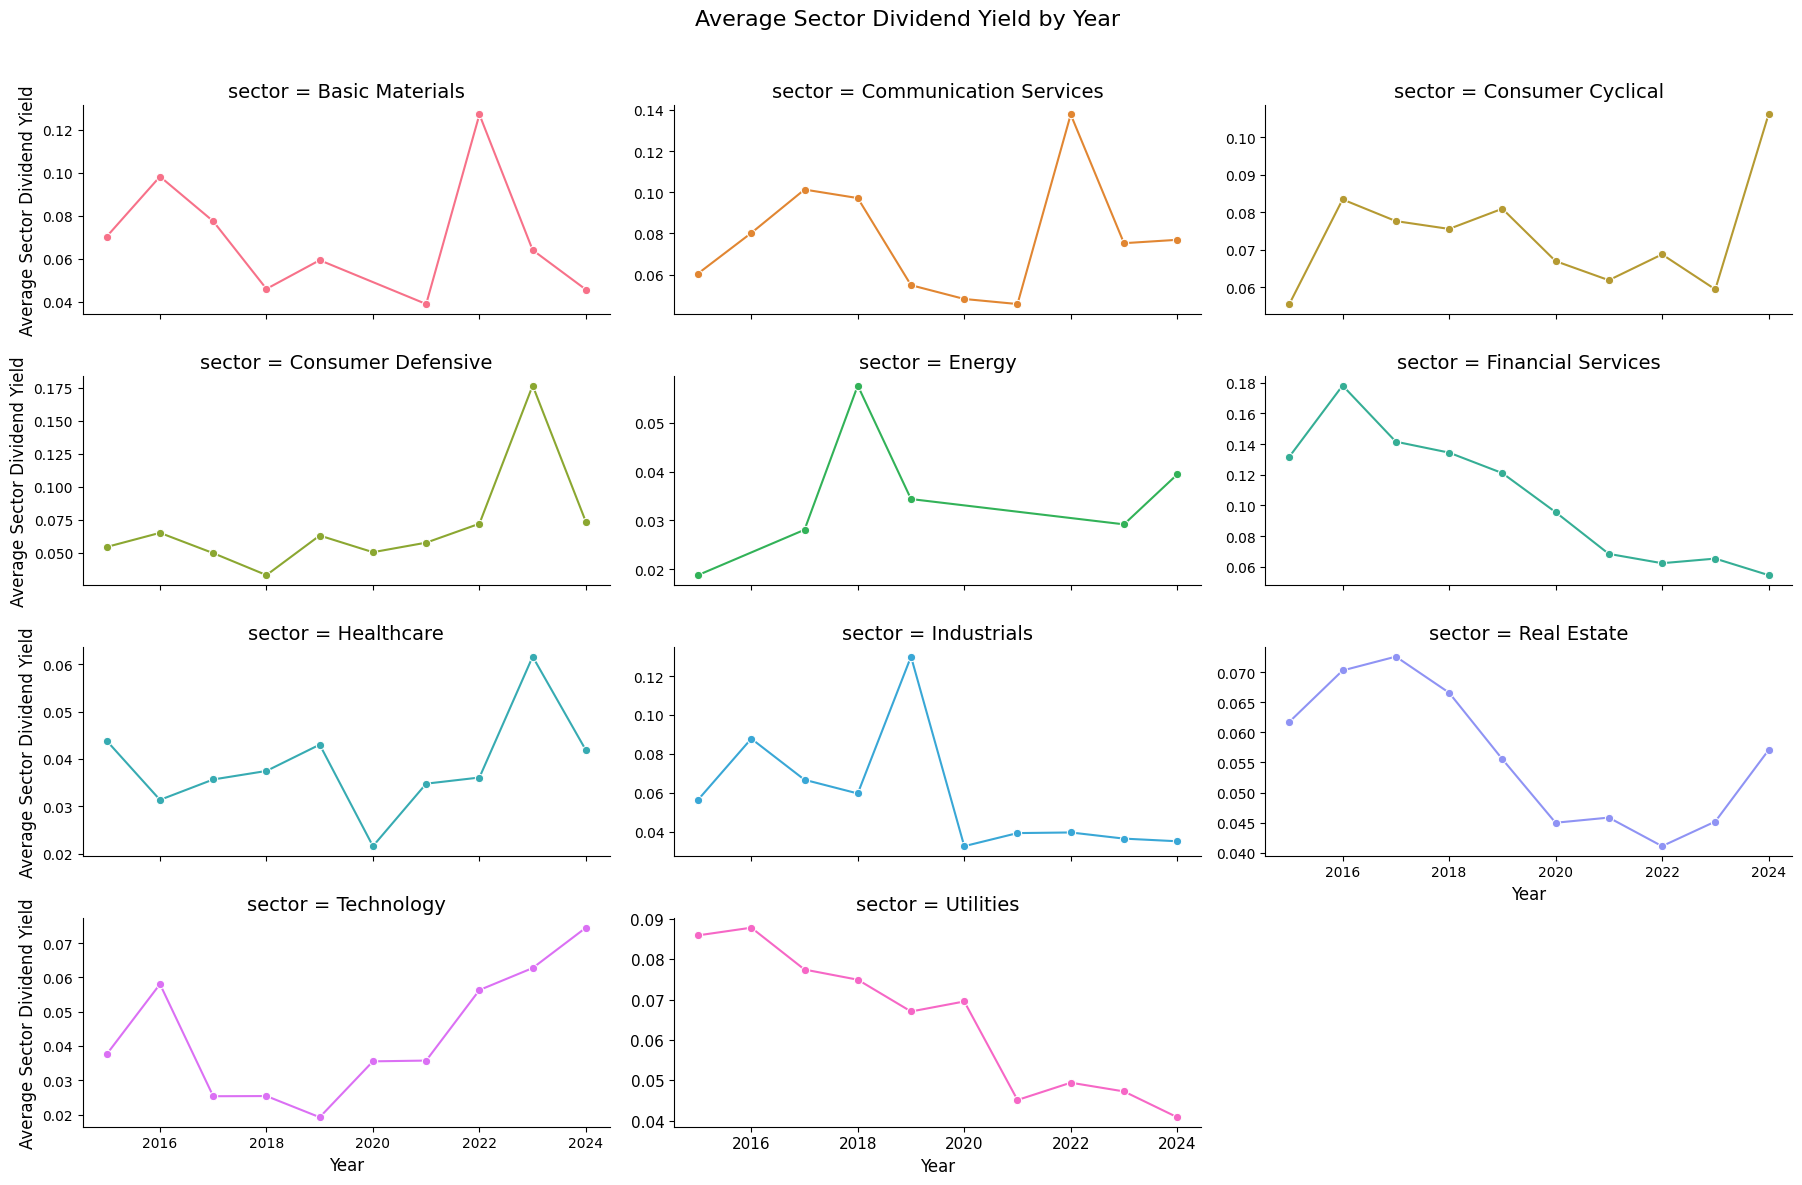

In [196]:
import matplotlib.pyplot as plt


# Create a FacetGrid with vertical stacking (one per row)
g = sns.FacetGrid(sector_avg_dividends_yield_df, col="sector", hue="sector", col_wrap=3, sharey=False, height=3, aspect=2)
g.map(sns.lineplot, "year", "avg_sector_dividend_yield", marker='o')


g.set_axis_labels("Year", "Average Sector Dividend Yield")
g.set_titles("{col_name} Sector")


# Adjust layout and font sizes for readability
plt.subplots_adjust(top=0.85, hspace=0.3)
g.set_xlabels(size=12)
g.set_ylabels(size=12)
g.set_titles(size=14)
g.figure.suptitle('Average Sector Dividend Yield by Year', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplots_adjust(top=0.9, hspace=0.3)

plt.show()

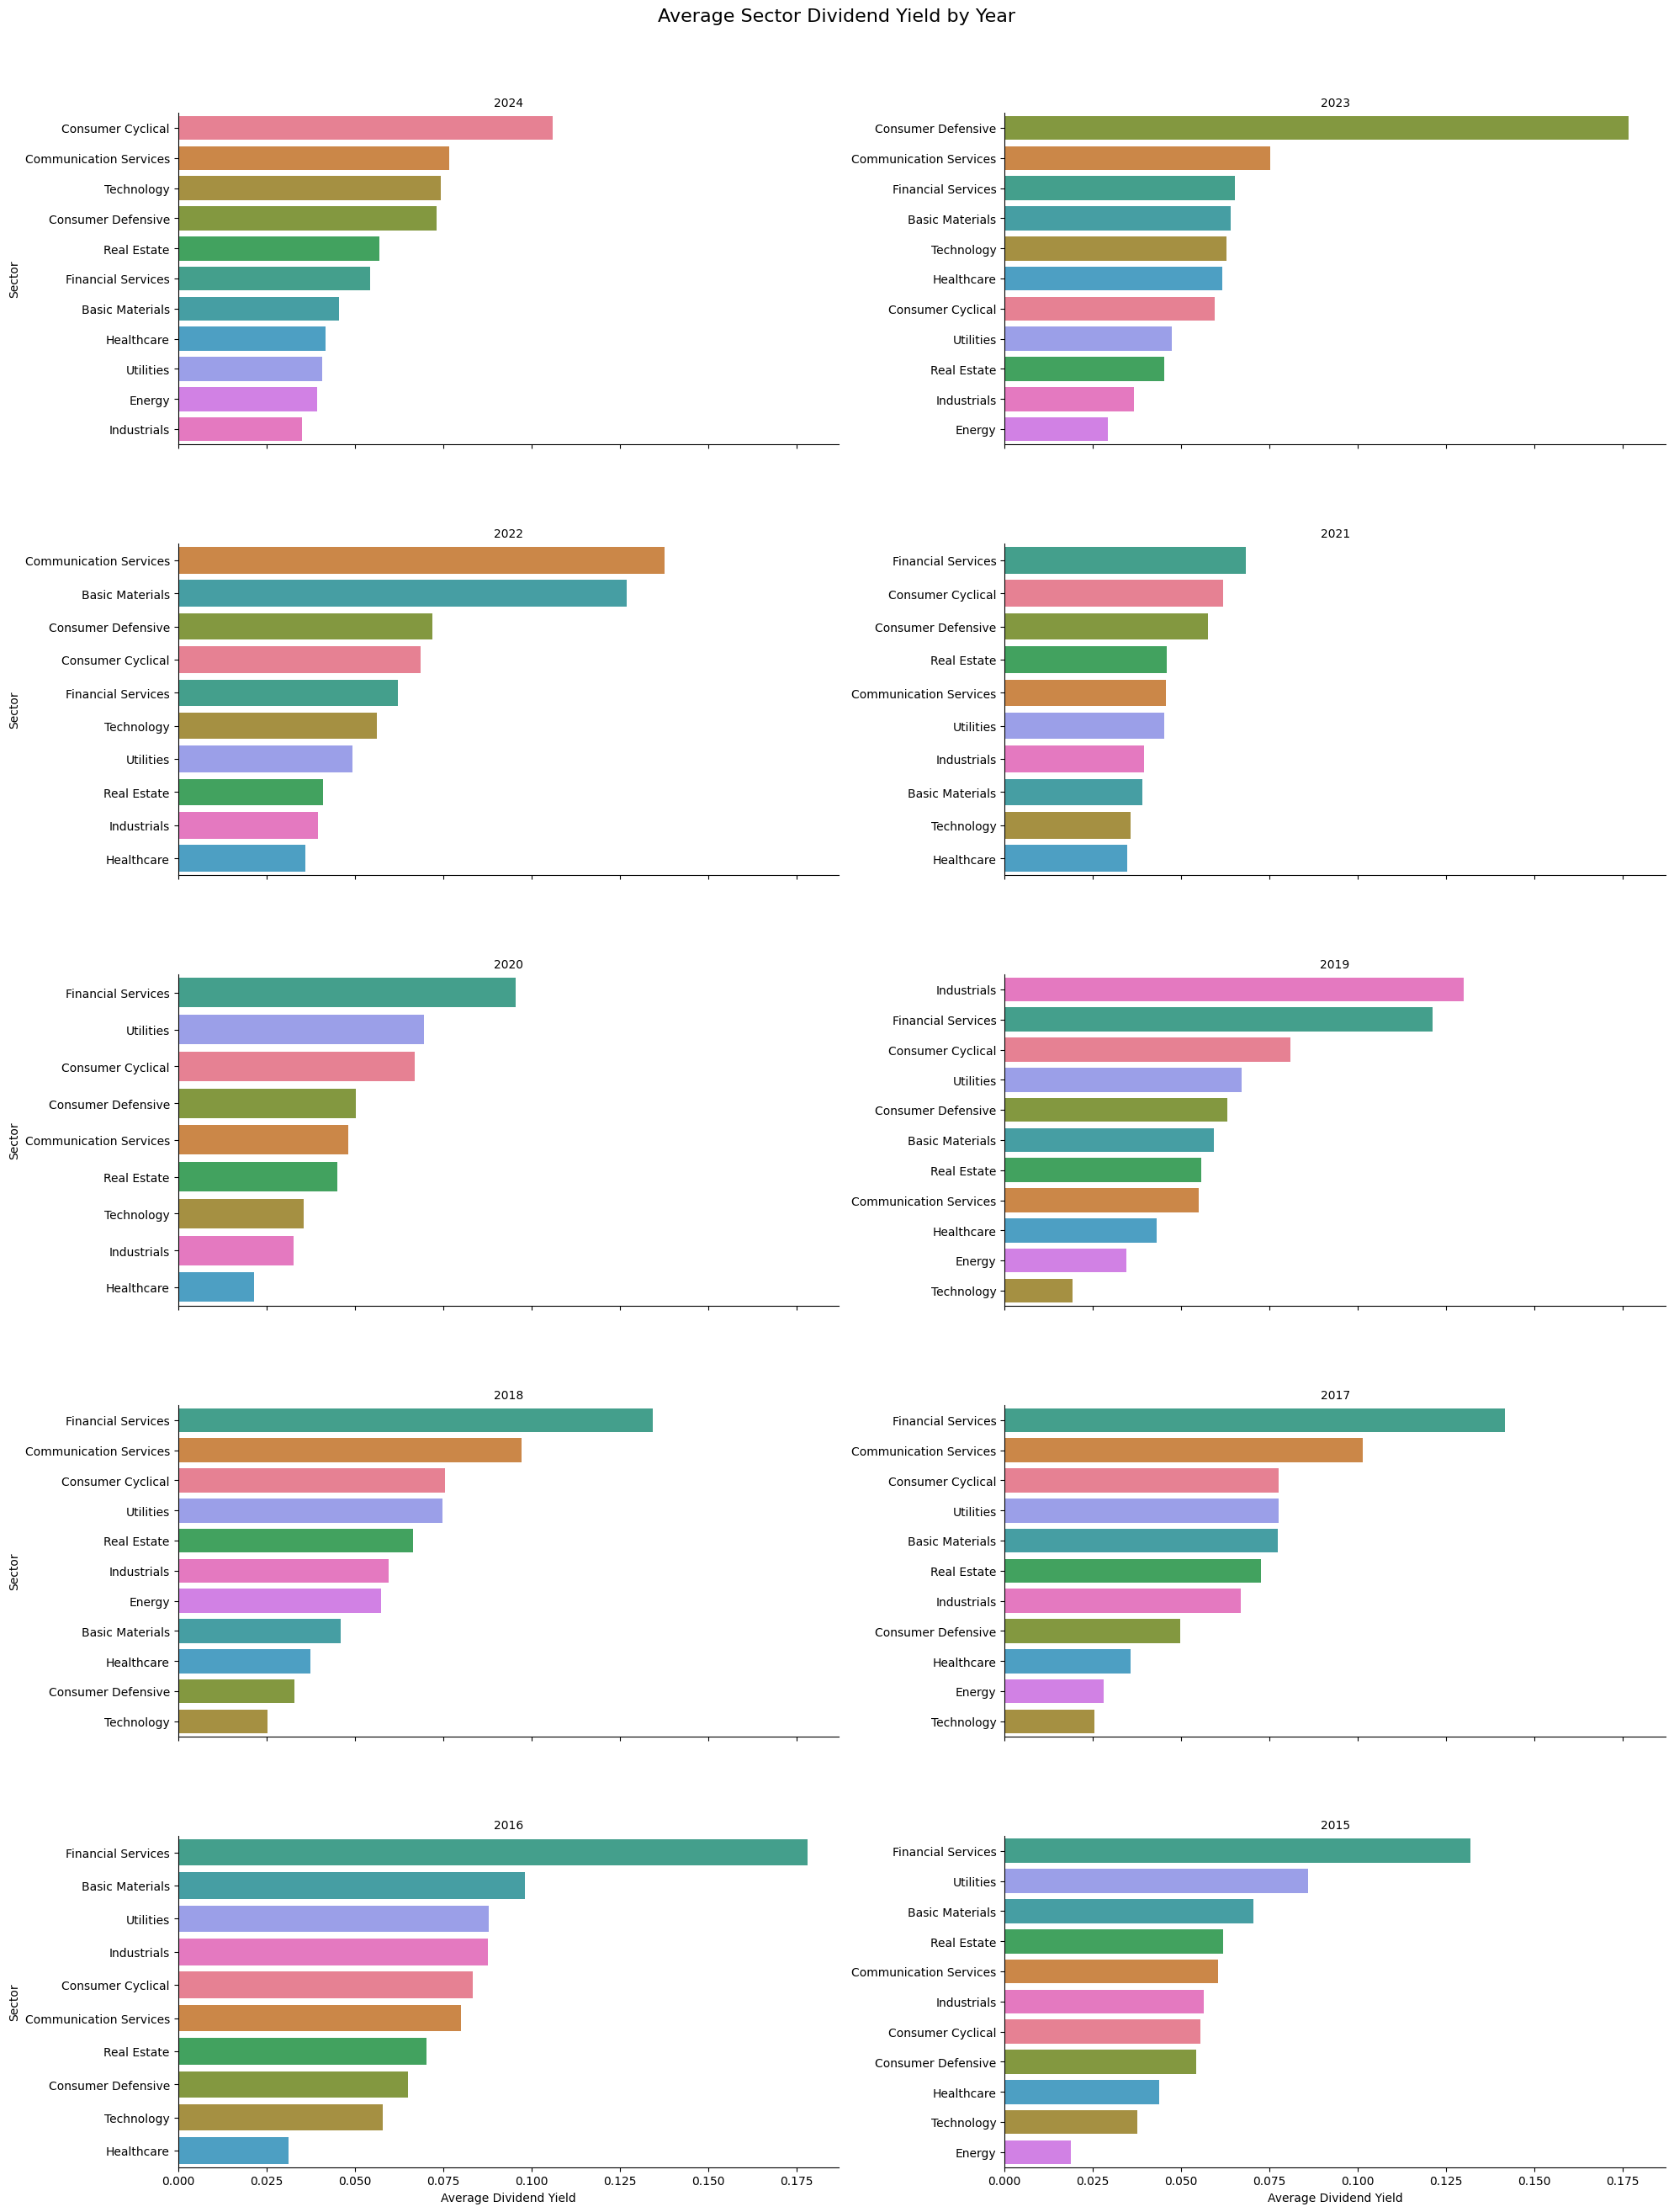

In [199]:
# Create a FacetGrid with vertical stacking (one per row)
# Sort the DataFrame by average dividend yield
sector_avg_dividends_yield_sorted_df = sector_avg_dividends_yield_df.sort_values(by=['year', 'avg_sector_dividend_yield'], ascending=[False, False])


# Use seaborn's catplot for better handling with sorting
g = sns.catplot(data=sector_avg_dividends_yield_sorted_df, 
                kind='bar', 
                x='avg_sector_dividend_yield', y='sector', 
                col='year', hue='sector',col_wrap=2,
                col_order=sector_avg_dividends_yield_sorted_df['year'].unique(), 
                sharey=False, height=5, aspect=2, orient='h')

# Add labels and title
g.set_axis_labels("Average Dividend Yield", "Sector")
g.set_titles("{col_name}")
g.figure.suptitle('Average Sector Dividend Yield by Year', fontsize=16, y=1.05)

# Adjust layout for spacing
plt.subplots_adjust(top=1, hspace=0.3)
plt.show()

In [200]:
sector_avg_dividends_yield_sorted_df['rank'] = sector_avg_dividends_yield_sorted_df.groupby('year')['avg_sector_dividend_yield'].rank(ascending=False)
sector_avg_dividends_yield_sorted_df

,sector,year,avg_sector_dividend_yield,rank
30,Consumer Cyclical,2024,0.106099,1.0
19,Communication Services,2024,0.076881,2.0
103,Technology,2024,0.074473,3.0
41,Consumer Defensive,2024,0.073288,4.0
92,Real Estate,2024,0.057050,5.0
...,...,...,...,...
21,Consumer Cyclical,2015,0.055452,7.0
32,Consumer Defensive,2015,0.054341,8.0
61,Healthcare,2015,0.043839,9.0
94,Technology,2015,0.037589,10.0


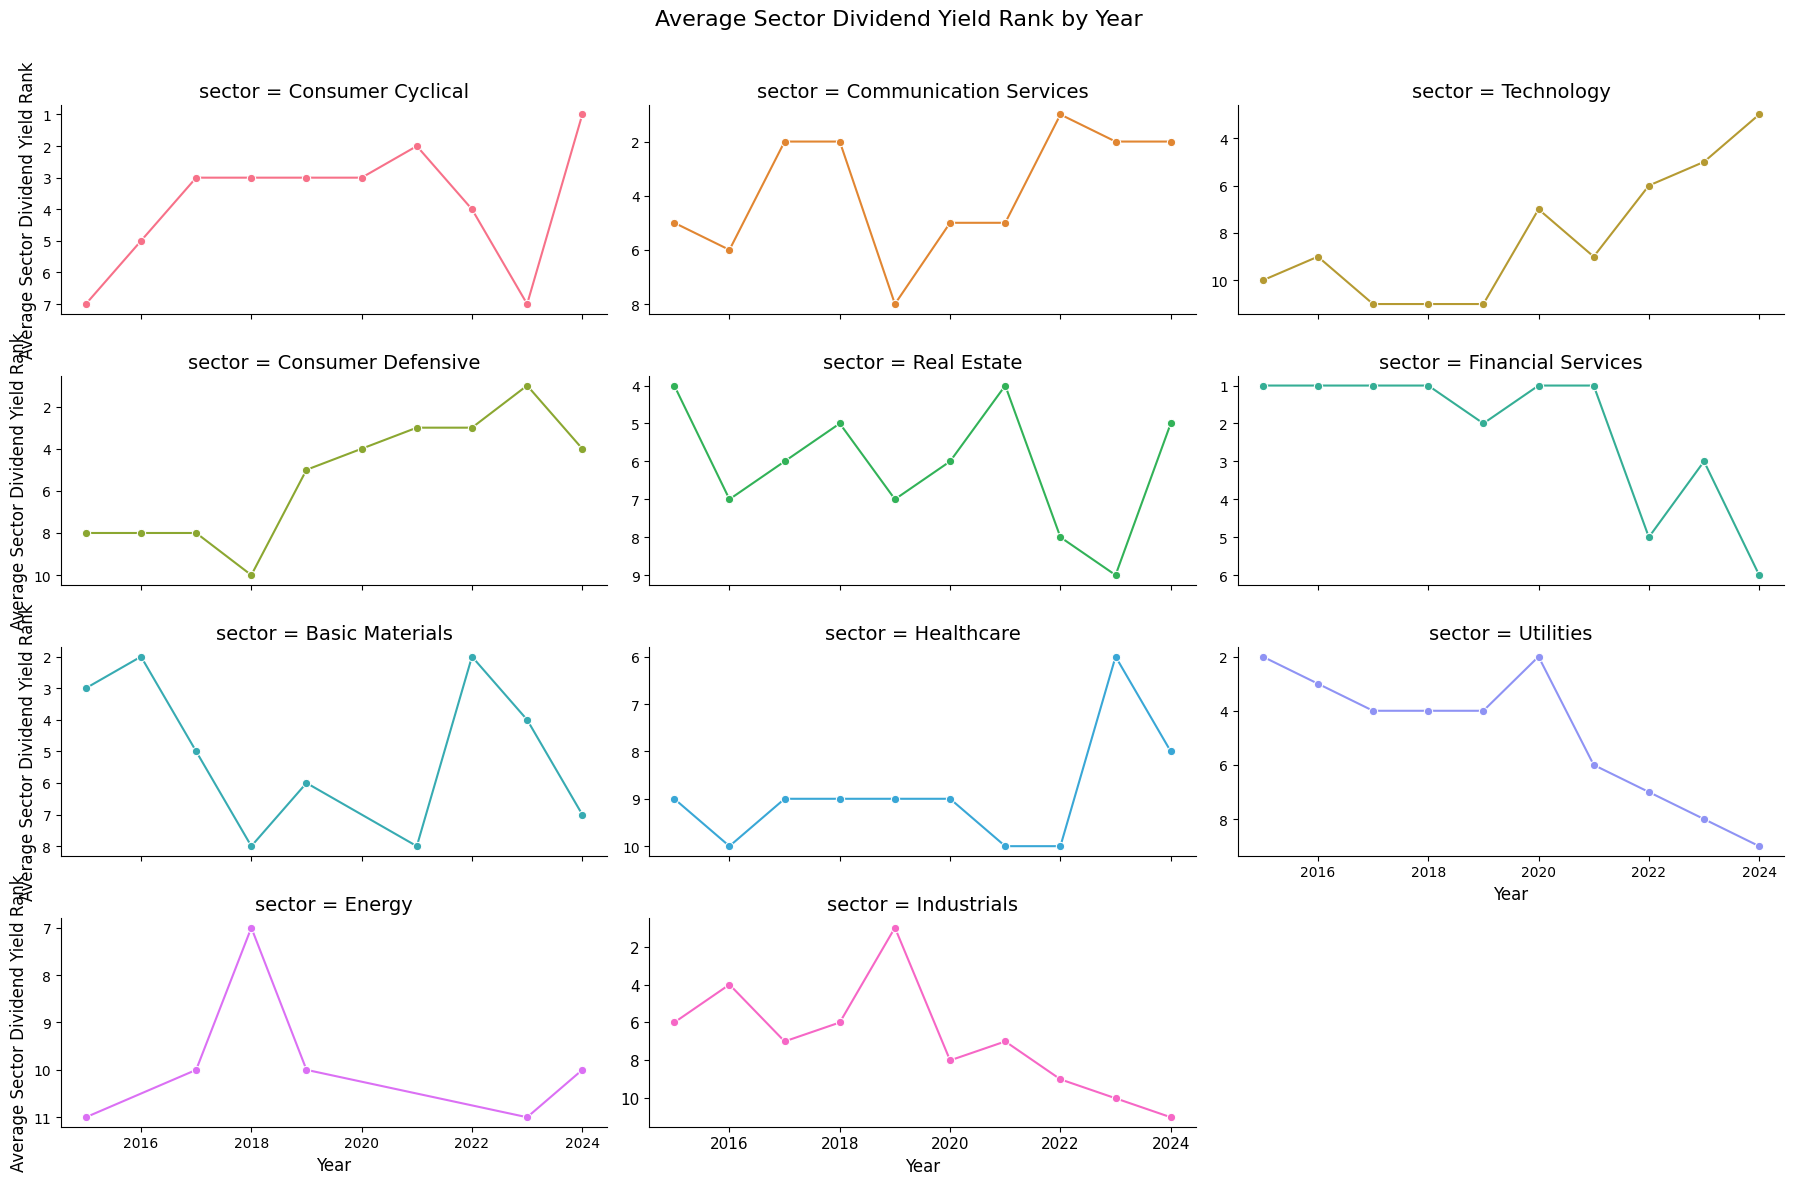

In [202]:
# Create a FacetGrid with vertical stacking (one per row)
g = sns.FacetGrid(sector_avg_dividends_yield_sorted_df, col="sector", hue="sector", col_wrap=3, sharey=False, height=3, aspect=2)
g.map(sns.lineplot, "year", "rank", marker='o')

# Invert the y-axis for rank
for ax in g.axes.flat:
    ax.invert_yaxis()
    
g.set_axis_labels("Year", "Average Sector Dividend Yield Rank")
g.set_titles("{col_name} Sector")


# Adjust layout and font sizes for readability
plt.subplots_adjust(top=0.85, hspace=0.3)
g.set_xlabels(size=12)
g.set_ylabels(size=12)
g.set_titles(size=14)
g.figure.suptitle('Average Sector Dividend Yield Rank by Year', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplots_adjust(top=0.9, hspace=0.3)

plt.show()

In [84]:
dividend_yield_df[dividend_yield_df['sector'] == 'Consumer Defensive'].sort_values(by='dividend_yield', ascending=False)

,close,dividends,company,sector,industry,dividend_yield,date
Date,,,,,,,
2019-08-08 00:00:00+12:00,0.410501,0.109760,Livestock Improvement Corporation Limited (NS),Consumer Defensive,Farm Products,0.267380,2019-08-07 12:00:00+00:00
2020-08-05 00:00:00+12:00,0.478250,0.127493,Livestock Improvement Corporation Limited (NS),Consumer Defensive,Farm Products,0.266583,2020-08-04 12:00:00+00:00
2023-09-27 00:00:00+13:00,1.925033,0.400000,Fonterra Co-operative Group Limited (NS),Consumer Defensive,Packaged Foods,0.207789,2023-09-26 11:00:00+00:00
2023-08-15 00:00:00+12:00,2.455136,0.500000,Fonterra Shareholders' Fund (NS),Consumer Defensive,Packaged Foods,0.203655,2023-08-14 12:00:00+00:00
2023-08-21 00:00:00+12:00,2.480188,0.500000,Fonterra Shareholders' Fund (NS),Consumer Defensive,Packaged Foods,0.201598,2023-08-20 12:00:00+00:00
...,...,...,...,...,...,...,...
2018-03-15 00:00:00+13:00,6.394996,0.037329,Comvita Limited,Consumer Defensive,Packaged Foods,0.005837,2018-03-14 11:00:00+00:00
2024-04-03 00:00:00+13:00,2.150000,0.010000,Comvita Limited,Consumer Defensive,Packaged Foods,0.004651,2024-04-02 11:00:00+00:00
2018-09-20 00:00:00+12:00,5.883943,0.018665,Comvita Limited,Consumer Defensive,Packaged Foods,0.003172,2018-09-19 12:00:00+00:00


In [ ]:
len(annualised_dividend_df['company'].unique())

In [ ]:
annualised_dividend_df[annualised_dividend_df['company'].str.contains('Liv')]

In [ ]:
annualised_dividend_df[annualised_dividend_df['dividend_yield'] > 0.1]

In [ ]:
annualised_dividend_df[annualised_dividend_df['company'].str.contains('Westpac')]

In [ ]:
data = {
    'Date': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01']),
    'Company': ['A', 'A', 'A', 'A'],
    'Close Price': [95, 105, 98, 110],
    'Dividends': [0.5, 0, 0.7, 0]
}

df = pd.DataFrame(data)
print(df)

In [ ]:
# dividend_yield_df = pd.DataFrame()

# for code in companies_df['Code']:
#     # Define the ticker symbol
#     ticker_symbol = f"{code}.NZ"

#     # Initialize the Ticker object
#     ticker = yf.Ticker(ticker_symbol)
    
#     # Get the historical data including dividends for the last year
#     historical_data = ticker.history(period="10y")
    
#     try:
#         if 'Dividends' in historical_data.columns:
#             dividend_df =  historical_data[historical_data['Dividends'] > 0].copy()
#             dividend_df['company'] = companies_df.loc[companies_df['Code'] == code, 'Company'].values[0]
#             dividend_df['dividend_yield'] = dividend_df['Dividends'].div(dividend_df['Close'], axis=0)
#             dividend_yield_df = pd.concat([dividend_yield_df, dividend_df[['company', 'Dividends','dividend_yield']]])
#             # for date, data in dividend_yield_df.iterrows():
#             #     print(f"Date: {date}")
#             #     if data['dividend_yield'] == None:
#             #         # print(ticker_symbol)
#             #         pos = historical_data.index.get_loc(date)
#             #         while pos > 0 and historical_data.iloc[pos, :]['Close'] == None:
#             #             pos -= 1
#             #         close = historical_data.iloc[pos, :]['Close']
#             #         dividend_yield_df.loc[date, 'dividend_yield'] = dividend_yield_df.loc[date, 'Dividends'] / close
#         else:
#             company_name = companies_df.loc[companies_df['Code'] == code, 'Company'].values[0]
#             raise KeyError(f"Dividends column not found for {company_name}.")  # Raise KeyError if Dividends column doesn't exist
#     except KeyError as e:
#         print(f"Exception: {str(e)}")

# Initialize an empty DataFrame to store dividend yields
dividend_yield_df = pd.DataFrame()

# Iterate over each company code in the provided DataFrame
for _, (code, company) in companies_df.iterrows():
    # Define the ticker symbol for the New Zealand Stock Exchange
    ticker_symbol = f"{code}.NZ"
    
    # Initialize the Ticker object using yfinance
    ticker = yf.Ticker(ticker_symbol)
    
    # Fetch historical stock data for the last 10 years
    historical_data = ticker.history(period="10y")
    
    try:
        # Check if 'Dividends' column is present in the historical data
        if 'Dividends' in historical_data.columns:
            # Filter rows where dividends are greater than zero
            dividend_df = historical_data[historical_data['Dividends'] > 0].copy()
            
            dividend_df['company'] = company
            
            # Calculate dividend yield by dividing dividends by closing price
            dividend_df['dividend_yield'] = dividend_df['Dividends'].div(dividend_df['Close'], axis=0)

            # Add a new column to label if adjustment was made
            dividend_df['close_price_substitution'] = False
            
            # Check for any NaN dividend yield values and recalculate if necessary
            for date, row in dividend_df.iterrows():
                if pd.isna(row['dividend_yield']):
                    pos = historical_data.index.get_loc(date)
                    # Find the closest previous non-NaN closing price
                    while pos > 0 and pd.isna(historical_data.iloc[pos]['Close']):
                        pos -= 1
                    close_price = historical_data.iloc[pos]['Close']
                    dividend_df.at[date, 'dividend_yield'] = row['Dividends'] / close_price
                    # Set the label if a different close price was used
                    dividend_df.at[date, 'close_price_substitution'] = True
            
            # Append results to the main DataFrame
            dividend_yield_df = pd.concat([dividend_yield_df, dividend_df[['company', 'Dividends', 'dividend_yield', 'close_price_substitution']]])
        else:
            # Handle cases where 'Dividends' column does not exist
            raise KeyError(f"Dividends column not found for {company}.")
    
    except KeyError as e:
        # Print exceptions related to missing data
        print(f"Exception: {str(e)}")

In [ ]:
# Initialize a list to collect dividend yield data
dividend_yields = []

def process_company_data(code):
    # Define the ticker symbol
    ticker_symbol = f"{code}.NZ"
    
    # Initialize the Ticker object
    ticker = yf.Ticker(ticker_symbol)
    
    # Fetch historical data
    historical_data = ticker.history(period="10y")
    
    if 'Dividends' not in historical_data.columns:
        company_name = companies_df.loc[companies_df['Code'] == code, 'Company'].values[0]
        print(f"Exception: Dividends column not found for {company_name}.")
        return

    # Filter rows with dividends
    dividend_df = historical_data[historical_data['Dividends'] > 0].copy()

    if dividend_df.empty:
        return

    # Company name
    company_name = companies_df.loc[companies_df['Code'] == code, 'Company'].values[0]
    dividend_df['company'] = company_name
    
    # Forward fill closing prices in full historical data
    historical_data['Close_filled'] = historical_data['Close'].bfill().ffill()

    # Initialize 'dividend_yield' and 'close_price_substitution' columns
    dividend_df['dividend_yield'] = pd.NA
    dividend_df['close_price_substitution'] = False

    # Calculate dividend yield and determine if a filled value was used
    for date, row in dividend_df.iterrows():
        original_close = row['Close']
        filled_close = row['Close_filled']
        close_price_used = original_close
        
        if pd.isna(original_close):  # Check if the original 'Close' is NaN
            close_price_used = filled_close  # Use the filled close price
            dividend_df.at[date, 'close_price_substitution'] = True
        
        # Calculate dividend yield
        dividend_df.at[date, 'dividend_yield'] = row['Dividends'] / close_price_used
    
    # Append the processed data to the list
    dividend_yields.append(dividend_df[['company', 'Dividends', 'dividend_yield', 'close_price_substitution']])

# Main loop over companies
for code in companies_df['Code']:
    process_company_data(code)

# Final DataFrame from accumulated data
dividend_yield_df = pd.concat(dividend_yields, ignore_index=True)

In [ ]:
dividend_yield_df.sort_values(by='dividend_yield', ascending=False)

In [ ]:
dividend_yield_df.info()

In [ ]:
dividend_yield_df[dividend_yield_df['dividend_yield'].isna()]